In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Load data
df = pd.read_excel('/Users/jinli/Downloads/OnlineRetail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [6]:
#Data clean up

In [8]:
df=df.loc[df['Quantity']>0]
df.shape

(531285, 8)

In [9]:
df = df[pd.notnull(df['CustomerID'])]
df.shape

(397924, 8)

In [10]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))
df = df.loc[df['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [11]:
df.shape

(380620, 8)

In [12]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
##- Per Customer Data
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum,
    'InvoiceNo': lambda x: x.nunique()
})

customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']

In [14]:
customer_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [15]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,1952.818779,4.131689,400.255621
std,8354.913254,7.420253,1271.187289
min,0.000000,1.000000,0.000000
25%,304.305000,1.000000,178.602500
50%,657.265000,2.000000,295.033958
75%,1599.515000,4.000000,431.594250
max,268478.000000,201.000000,77183.600000


In [23]:
#rank: to show the rank btw rows
#method=first: for the same number, the rank is in order they appear in the array
rank_df = customer_df.rank(method='first')

In [24]:
rank_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0


In [25]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622


In [26]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4.298000e+03,4.298000e+03,4.298000e+03
mean,9.952744e-17,-1.231371e-16,5.719018e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731446e+00,-1.731446e+00,-1.731446e+00
25%,-8.657232e-01,-8.657232e-01,-8.657232e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.657232e-01,8.657232e-01,8.657232e-01
max,1.731446e+00,1.731446e+00,1.731446e+00


In [27]:
#3. Customer Segmentation via K-Means Clustering

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
kmeans.labels_

array([1, 0, 0, ..., 3, 2, 0], dtype=int32)

In [31]:
kmeans.cluster_centers_

array([[ 1.20630621,  1.00552238,  0.86837366],
       [-0.13271459, -0.85015948,  0.79867905],
       [ 0.21773456,  0.71494435, -0.64237996],
       [-1.24645935, -0.79772735, -1.06106555]])

In [34]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [37]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1131
1    1064
2     953
3    1150
Name: TotalSales, dtype: int64

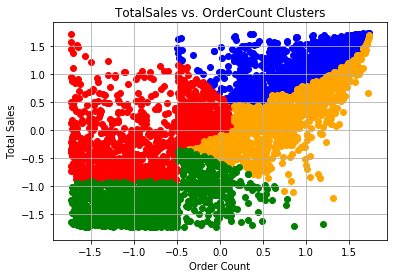

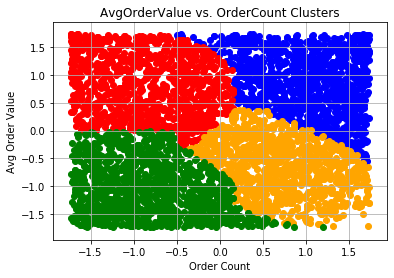

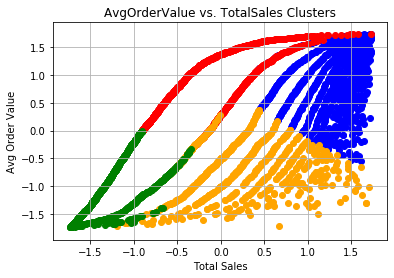

In [38]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

In [39]:
#- Selecting the best number of clusters
from sklearn.metrics import silhouette_score

for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

#In our case, of the five different numbers of clusters we have experimented with, the best number of clusters with the highest silhouette score was 4.
#silhouette score:最佳值为1，最差值为-1。接近0的值表示重叠的群集。负值通常表示样本已分配给错误的聚类，因为不同的聚类更为相似。


Silhouette Score for 4 Clusters: 0.4112
Silhouette Score for 5 Clusters: 0.3779
Silhouette Score for 6 Clusters: 0.3784
Silhouette Score for 7 Clusters: 0.3913
Silhouette Score for 8 Clusters: 0.3809


In [40]:
#- Interpreting Customer Segments
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [41]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12353.0,-1.636352,-1.729029,-1.570269,2
12361.0,-1.243079,-1.724999,-0.776471,2
12375.0,-0.392870,-0.488770,-0.433970,2
12386.0,-0.524229,-0.485546,-0.667677,2
12401.0,-1.644411,-1.719358,-1.586387,2


In [42]:
customer_df.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,1166.000000,1166.000000,1166.000000
mean,194.297118,1.336192,152.775923
std,92.031455,0.577261,63.186141
min,0.000000,1.000000,0.000000
25%,124.647500,1.000000,108.131250
50%,183.775000,1.000000,151.840000
75%,250.972500,2.000000,198.648750
max,483.800000,6.000000,292.470000


In [43]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
REX CASH+CARRY JUMBO SHOPPER,139
WHITE HANGING HEART T-LIGHT HOLDER,137
REGENCY CAKESTAND 3 TIER,81
ASSORTED COLOUR BIRD ORNAMENT,78
BAKING SET 9 PIECE RETROSPOT,72


In [44]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(
            four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index
        )
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
JUMBO BAG RED RETROSPOT,1129
REGENCY CAKESTAND 3 TIER,1079
WHITE HANGING HEART T-LIGHT HOLDER,1065
LUNCH BAG RED RETROSPOT,923
PARTY BUNTING,858
